In [29]:
import numpy as np
from matplotlib.pyplot import plot, show

In [3]:
# 使用mat、matrix以及bmat函数来创建矩阵

#  mat函数创建矩阵时，若输入已为matrix或ndarray对象，则不会为它们创建副本
# 调用mat函数和调用matrix(data, copy=False)等价

# 用字符串创建
A = np.mat('1 2 3; 4 5 6; 7 8 9')
A

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [4]:
#转置
A.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [5]:
# 逆矩阵
A.I

matrix([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
        [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
        [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [6]:
# 用Numpy数组进行后才能关键
np.mat(np.arange(9).reshape(3, 3))

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [7]:
# 从己有的矩阵创建新矩阵
A = np.eye(2)
B = 2 * A
B

array([[2., 0.],
       [0., 2.]])

In [8]:
# 用字符串创建复合矩阵, ;是矩阵的行分隔符
np.bmat('A B; A B')

matrix([[1., 0., 2., 0.],
        [0., 1., 0., 2.],
        [1., 0., 2., 0.],
        [0., 1., 0., 2.]])

In [9]:
# 通用函数
def ultimate_answer(a): 
    result = np.zeros_like(a) 
    result.flat = 42 
    return result

# 使用frompyfunc创建通用函数。指定输入参数的个数为1，随后的1为输出参数的个数
ufunc = np.frompyfunc(ultimate_answer, 1, 1)
ufunc(np.arange(4).reshape(2, 2))

array([[array(42), array(42)],
       [array(42), array(42)]], dtype=object)

In [10]:
# 通用函数是能够表达函数的对象
# 通用函数有四个方法，不过这些方法只对输入两个参数、输出一个参数的ufunc对象有效，如add
# 有4个方法：reduce、accumulate、reduceat、outer

In [11]:
# 在add函数上分别调用4种方法

# 1.reduce
# 沿着指定的轴，在连续的数组元素之间递归调用通用函数，即可得到输入数组的规约
#（reduce）计算结果。对于add函数，其对数组的reduce计算结果等价于对数组元素求和
a = np.arange(9)
np.add.reduce(a)

36

In [12]:
# 2. accumulate
np.add.accumulate(a)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36], dtype=int32)

In [13]:
# 3. reduceat
# 需要输入一个数组以及一个索引值列表作为参数
np.add.reduceat(a, [0, 5, 2, 7])

array([10,  5, 20, 15], dtype=int32)

In [14]:
# 步骤分解
# 第一步
print(np.add.reduce(a[0:5]))
# 第二步
print(a[5])
# 第三步
print(np.add.reduce(a[2:7]))
# 第四步
print(np.add.reduce(a[7:]))

10
5
20
15


In [15]:
# 4. outer
#  outer方法返回一个数组，它的秩（rank）等于两个输入数组的秩的和。
# 会作用于两个输入数组之间存在的所有元素对
print(np.add.outer(np.arange(1, 4),np.arange(1, 3)))
np.add.outer(np.arange(1, 3), np.arange(4))

[[2 3]
 [3 4]
 [4 5]]


array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

In [16]:
# 算术运算
# 数组的除法运算
# divide函数
a = np.array([2, 6, 5])
b = np.array([1, 2, 3])
np.divide(a, b), np.divide(b, a)

(array([2.        , 3.        , 1.66666667]),
 array([0.5       , 0.33333333, 0.6       ]))

In [17]:
# true_divide函数
np.true_divide(a, b)

array([2.        , 3.        , 1.66666667])

In [18]:
# floor_divide函数总是返回整数结果，相当于先调用divide函数再调用floor函数。
np.floor_divide(a, b)

array([2, 3, 1], dtype=int32)

In [19]:
# /运算符相当于divide函数
a/b

array([2.        , 3.        , 1.66666667])

In [20]:
# //相当于floor_divide函数
a//b

array([2, 3, 1], dtype=int32)

In [21]:
# 模运算
# remainder函数逐个返回两个数组中元素相除后的余数，如果第二个数字为0，则直接返回0
a = np.arange(-4, 4)
a, np.remainder(a, 2)

(array([-4, -3, -2, -1,  0,  1,  2,  3]),
 array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int32))

In [22]:
# mod函数与remainder一致
np.mod(a, 2)

array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [23]:
# %为简写
a%2

array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [24]:
# fmod函数，所得余数的正负由被除数决定，与除数的正负无关
np.fmod(a, 2)

array([ 0, -1,  0, -1,  0,  1,  0,  1], dtype=int32)

In [25]:
# 斐波那契数列
# 斐波那契数列的计算等价于矩阵的连乘
F = np.matrix([[1, 1], [1, 0]])
(F ** 7)[0, 0]

21

In [26]:
# 黄金分割公式，加上取整函数，就可以直接计算斐波那契数
n = np.arange(1, 9)
sqrt5 = np.sqrt(5)
phi = (1 + sqrt5)/2

fibonacci = np.rint((phi**n - (-1/phi)**n)/sqrt5)
fibonacci,phi, phi **n

(array([ 1.,  1.,  2.,  3.,  5.,  8., 13., 21.]),
 1.618033988749895,
 array([ 1.61803399,  2.61803399,  4.23606798,  6.85410197, 11.09016994,
        17.94427191, 29.03444185, 46.97871376]))

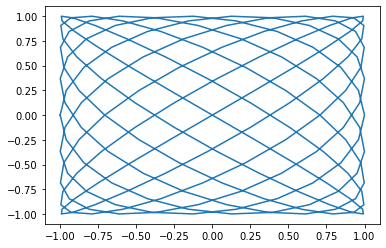

In [31]:
# 利萨茹曲线
# 是一种使用三角函数的方式
# 利萨茹曲线的参数包括A、B、a和b。为简单起见，我们令A和B均为1 

# 使用linspace函数初始化从-pi到pi上均匀分布的201个点
a = float(9)
b = float(8)
t = np.linspace(-np.pi, np.pi, 201)

# sin函数
x = np.sin(a * t + np.pi / 2)
y = np.sin(b * t)

plot(x, y) 
show()

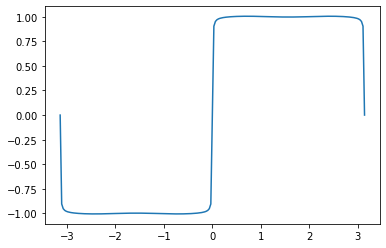

In [32]:
# 方波
# 任意一个方波信号都可以用无穷傅里叶级数来表示

t = np.linspace(-np.pi, np.pi, 201)
k = np.arange(1, float(99))
k = 2 * k - 1
f = np.zeros_like(t)

for i in range(len(t)):
    f[i] = np.sum(np.sin(k*t[i])/k)
    
f = (4 / np.pi) * f
plot(t, f)
show()

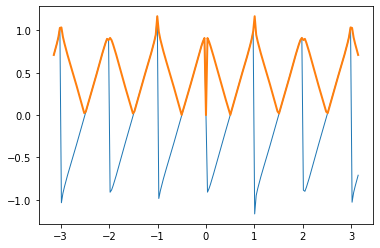

In [35]:
# 锯齿波和三角波
t = np.linspace(-np.pi, np.pi, 201)
k = np.arange(1, float(99))
f = np.zeros_like(t)

for i in range(len(t)):
    f[i] = np.sum(np.sin(2 * np.pi * k * t[i]) / k)
f = (-2 / np.pi) * f

plot(t, f, lw=1.0) 
plot(t, np.abs(f), lw=2.0) 
show()

In [37]:
# 位操作函数和比较函数
# 位操作函数可以在整数或整数数组的位上进行操作，它们都是通用函数。
# ^、&、|、<<、>>等位操作符在NumPy中也有对应的部分，<、>、==等比较运算符也是如此

# XOR
x = np.arange(-9, 9)
y = -x
(x ^ y) < 0, np.less(np.bitwise_xor(x, y), 0)

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True]))

In [42]:
# &, ==
# 在2的幂数以及比它小1的数之间执行位与操作AND，那么应该得到0。
(x & (x-1)) == 0 , np.equal(np.bitwise_and(x, (x - 1)), 0)

(array([False, False, False, False, False, False, False, False, False,
         True,  True,  True, False,  True, False, False, False,  True]),
 array([False, False, False, False, False, False, False, False, False,
         True,  True,  True, False,  True, False, False, False,  True]))

In [44]:
# <<操作符对应于left_shift函数
x & ((1 << 2) - 1),  np.bitwise_and(x, np.left_shift(1, 2) - 1), 1 << 2

(array([3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0], dtype=int32),
 array([3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0], dtype=int32),
 4)